In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
def detect_cat_and_num(dataframe, cat_th = 10, car_th = 20):
    cat = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O']
    cat_but_num = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat = cat + num_but_cat
    cat = [col for col in cat if col not in cat_but_num]
    
    num = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and dataframe[col].nunique() > car_th] 
    num = [col for col in num if col not in num_but_cat]
    
    return cat, num, cat_but_num
    

In [7]:
cat, num, cat_but_num = detect_cat_and_num(data)
print(cat)
print(cat_but_num)
print(num)

['Outcome']
[]
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [8]:
print(data['Pregnancies'].nunique())
print(data['Glucose'].nunique())
print(data['BloodPressure'].nunique())
print(data['SkinThickness'].nunique())
print(data['Insulin'].nunique())
print(data['BMI'].nunique())
print(data['DiabetesPedigreeFunction'].nunique())
print(data['Age'].nunique())
print(data['Outcome'].nunique())


17
136
47
51
186
248
517
52
2


In [9]:
for col in cat:
    print(data.groupby(cat)['Outcome'].agg(['mean']))

         mean
Outcome      
0         0.0
1         1.0


In [10]:
for col in num:
    print(data.groupby('Outcome')[col].agg('mean'))

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


In [11]:
def interquantile(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    iqr = quantile3 - quantile1
    up = quantile3 + 1.5 * iqr
    down = quantile1 - 1.5 * iqr
    return down, up

In [12]:
def check_outlier(dataframe, col_name):
    down, up = interquantile(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < down)].shape[0] > 0:
        return True
    else:
        return False

In [13]:
outliers = []
for col in data.columns:
    if check_outlier(data, col) == True:
        outliers.append(col)
print(outliers)        

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [14]:
def fill_outliers(dataframe, col_name):
    down, up = interquantile(dataframe, col_name)
    dataframe.loc[dataframe[col_name] < down, col_name] = down
    dataframe.loc[dataframe[col_name] > up, col_name] = up
    return dataframe

In [15]:
for col in outliers:
    fill_outliers(data, col)

In [16]:
for col in data.columns:
    print(col, check_outlier(data, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
!pip install missingno


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


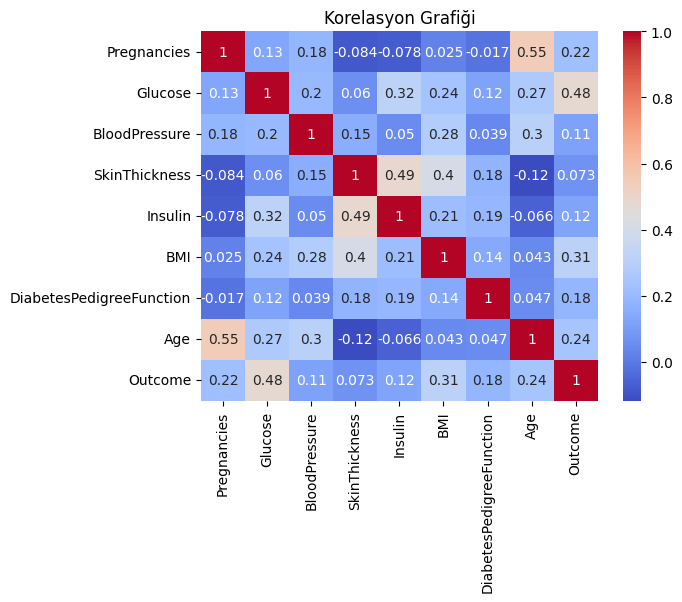

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Grafiği gösterelim
plt.title('Korelasyon Grafiği')
plt.show()

In [20]:
zero_cols = [col for col in data.columns if data[col].min() == 0 and col not in ['Pregnancies','Outcome']]

In [21]:
zero_cols

['SkinThickness', 'Insulin']

In [22]:
for col in zero_cols:
    data[col] = np.where(data[col] == 0, np.nan, data[col])

In [23]:
data.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
for col in zero_cols:
    data.loc[data[col].isnull(), col] = data[col].median()

In [26]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,1


In [28]:
data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
data['Age2'] = pd.qcut(data['Age'], q = 3, labels = ['Young', 'Mature', 'Old'])

In [30]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,1,Old
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,0,Mature
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,1,Mature
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0,Young
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1,Mature
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0,Old
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,0,Mature
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0,Mature
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,1,Old


In [31]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    print(data.groupby('Age2')[col].agg('mean'))

Age2
Young     111.136236
Mature    122.368421
Old       130.449803
Name: Glucose, dtype: float64
Age2
Young     65.558052
Mature    70.299595
Old       76.448819
Name: BloodPressure, dtype: float64
Age2
Young     27.044944
Mature    29.955466
Old       30.377953
Name: SkinThickness, dtype: float64
Age2
Young     125.050562
Mature    137.701923
Old       141.395177
Name: Insulin, dtype: float64
Age2
Young     30.633895
Mature    32.889271
Old       32.949409
Name: BMI, dtype: float64


In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,1,Old
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,0,Mature
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,1,Mature
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,0,Young
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,1,Mature
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,0,Old
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,0,Mature
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,0,Mature
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,1,Old


In [33]:
Y = data['Outcome']
X = data.drop('Outcome', axis = 1)

In [34]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age2
0,6.0,148.0,72,35.0,125.0,33.6,0.627,50.0,Old
1,1.0,85.0,66,29.0,125.0,26.6,0.351,31.0,Mature
2,8.0,183.0,64,29.0,125.0,23.3,0.672,32.0,Mature
3,1.0,89.0,66,23.0,94.0,28.1,0.167,21.0,Young
4,0.0,137.0,40,35.0,168.0,43.1,1.200,33.0,Mature
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,0.171,63.0,Old
764,2.0,122.0,70,27.0,125.0,36.8,0.340,27.0,Mature
765,5.0,121.0,72,23.0,112.0,26.2,0.245,30.0,Mature
766,1.0,126.0,60,29.0,125.0,30.1,0.349,47.0,Old


In [35]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
data = data.drop(['DiabetesPedigreeFunction', 'Age2'], axis = 1)
X = data


In [37]:
X = X.drop('Outcome',axis=1)

In [38]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72,35.0,125.0,33.6,50.0
1,1.0,85.0,66,29.0,125.0,26.6,31.0
2,8.0,183.0,64,29.0,125.0,23.3,32.0
3,1.0,89.0,66,23.0,94.0,28.1,21.0
4,0.0,137.0,40,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76,48.0,180.0,32.9,63.0
764,2.0,122.0,70,27.0,125.0,36.8,27.0
765,5.0,121.0,72,23.0,112.0,26.2,30.0
766,1.0,126.0,60,29.0,125.0,30.1,47.0


In [39]:
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X  = pd.DataFrame(scaled_data,columns = columns_to_scale)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0.647150,0.861926,0.092691,0.686889,-0.156977,0.209359,1.445691
1,-0.848970,-1.159433,-0.330201,-0.009674,-0.156977,-0.784254,-0.189304
2,1.245598,1.984903,-0.471166,-0.009674,-0.156977,-1.252672,-0.103252
3,-0.848970,-1.031093,-0.330201,-0.706238,-0.667869,-0.571337,-1.049828
4,-1.148194,0.508990,-2.162737,0.686889,0.551680,1.557835,-0.017199
...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,2.196109,0.749444,0.109998,2.564372
764,-0.549746,0.027714,-0.048273,-0.241862,-0.156977,0.663583,-0.533513
765,0.347926,-0.004371,0.092691,-0.706238,-0.371222,-0.841032,-0.275356
766,-0.848970,0.156054,-0.753094,-0.009674,-0.156977,-0.287447,1.187534


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7560975609756098
Precision: 0.7
Recall: 0.5
F1-score: 0.5833333333333334
